## Assignment: Design and Application of a Machine
## Learning System for a Practical Problem

<span style='font-family:"Times New Roman"'><font size="4">*__3. Additional Comparative Study__*</font></span><br>
><span style='font-family:"Times New Roman"'><font size="4">Thanks to the good results obtained in the comparative study, the company has deployed your
system and is obtaining good profit. Now a competitor would like to hire you to design a similar
system for them but, unlike the first system, they would like you to predict not only if the insured
files a claim but also the value of the claim.
They provide you with a training set of historical data containing features of each customer
and a numerical value representing the value of the claim (which may be zero). These data are
available in the __CE802_P3_Data.zip__ archive available from the CE802 moodle page. In this part of
the assignment, you are asked to perform the following two tasks.</font></span>

<span style='font-family:"Times New Roman"'><font size="4"> __a) Investigate the performance of a number of machine learning procedures on this dataset.__</font></span><br>
<span style='font-family:"Times New Roman"'><font size="4"> Using the data in the file __CE802_P3_Data.csv__ contained in the __CE802_P3_Data.zip__ archive, you are required to perform a comparative study of the following machine learning procedures:</font></span><br>
* <span style='font-family:"Times New Roman"'><font size="4">Linear Regression;</font></span>
* <span style='font-family:"Times New Roman"'><font size="4">at least two more ML technique to predict the value of the claim.</font></span>

<span style='font-family:"Times New Roman"'><font size="4">This company too uses Python internally and therefore Python with scikit-learn is the required language and machine learning library for the problem. For this task, you are expected to submit a
Jupyter Notebook called __CE802_P3_Notebook.ipynb__ containing the Python code used to perform the comparative analysis and produce the results as well as the code used to perform the predictions described in task “b” below.</font></span><br>
<br><span style='font-family:"Times New Roman"'><font size="4">__Importing essential libraries__
<hr>

In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics.scorer import make_scorer
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline
train_data = pd.read_csv("CE802_P3_Data.csv",sep=',')
test_data = pd.read_csv("CE802_P3_Test.csv",sep=',')
result_file="Results/CE802_P3_Test.csv"


C:\Conda\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)

Bad key "text.kerning_factor" on line 4 in
C:\Conda\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


<span style='font-family:"Times New Roman"'><font size="4">__Data loading__
<hr>

In [2]:
train_data

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,Target
0,16.56,12.42,-236.06,Rest,-98.88,529.56,4.54,379.54,1,1,7.30,High,-15085.87,-12.93,-39.42,1734.58,3616.82
1,11.72,12.46,-190.06,Rest,-59.22,493.11,0.05,402.78,5,3,-1.28,Very low,-15782.44,-8.55,-35.61,1672.70,3342.88
2,4.34,2.74,-201.20,UK,-228.48,563.79,1.22,147.35,4,4,8.28,Low,-10526.01,-9.66,-29.10,1462.86,0.00
3,12.76,2.58,-282.26,UK,-173.28,536.94,0.25,113.49,4,3,6.26,Low,-8327.14,-19.23,-34.59,809.46,1742.65
4,11.10,9.82,-242.86,USA,-193.14,617.52,9.15,343.64,8,6,-6.88,Very low,-14434.13,-9.45,-46.14,1435.90,373.56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,5.20,4.70,-218.72,Rest,-224.04,539.91,8.23,-232.93,2,3,12.32,Very high,-16977.67,5.01,-29.67,1420.16,1515.56
1496,12.10,2.98,-144.42,UK,-76.05,736.65,0.48,90.41,3,6,7.40,Medium,-13927.89,0.66,-36.06,1321.82,1528.48
1497,4.12,4.36,-160.30,Europe,-230.43,439.86,0.69,-224.44,3,3,7.02,Medium,-18373.26,-7.68,-39.42,1905.86,323.67
1498,1.58,13.50,-159.60,USA,-233.85,572.58,0.29,-126.79,1,5,1.68,Very high,-22863.72,-3.12,-54.36,2424.42,109.19


In [3]:
test_data

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,Target
0,28.70,0.82,-115.06,USA,-280.95,581.10,0.06,214.35,2,2,-0.88,Low,-14794.01,-15.09,-35.61,1578.68,NaN
1,5.40,6.90,-170.24,Rest,-228.00,330.54,0.31,-164.98,1,9,0.28,Medium,-11632.88,0.72,-29.73,1647.02,NaN
2,21.96,4.40,-219.12,Rest,-59.67,662.28,4.98,281.54,6,5,5.82,Low,-12631.29,-23.61,-32.73,1449.14,NaN
3,10.52,1.02,-184.14,UK,-211.23,506.55,0.57,-311.96,7,5,1.92,High,-26664.88,1.80,-22.92,911.98,NaN
4,2.00,0.58,-190.56,Rest,-284.82,649.41,0.05,291.47,8,3,-0.02,Low,-9901.41,-13.47,-48.81,2251.04,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,18.42,8.22,-213.52,Rest,-189.33,569.43,0.09,-315.11,2,3,8.64,Very high,-16759.93,-13.56,-37.08,869.80,NaN
1496,12.06,14.46,-251.02,Rest,-87.90,640.32,3.67,201.37,7,8,9.34,Very low,-11645.46,-4.35,-56.10,2040.40,NaN
1497,6.54,10.42,-156.28,Europe,-221.82,462.30,0.00,-267.50,2,6,5.00,Low,-23752.87,-8.37,-21.27,1130.64,NaN
1498,8.06,13.34,-211.82,UK,-483.24,766.38,0.19,140.38,4,6,5.34,Medium,-13748.25,-9.21,-18.96,1261.38,NaN


<span style='font-family:"Times New Roman"'><font size="4">__Data pre-preprocessing__
<hr>

In [4]:
# Replacing levels of comparison with numerical values 
cleanup = {"F12": {"Very low":1, "Low":2, "Medium":3, "High":4, "Very high":5}}
train_data = train_data.replace(cleanup)
train_data

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,Target
0,16.56,12.42,-236.06,Rest,-98.88,529.56,4.54,379.54,1,1,7.30,4,-15085.87,-12.93,-39.42,1734.58,3616.82
1,11.72,12.46,-190.06,Rest,-59.22,493.11,0.05,402.78,5,3,-1.28,1,-15782.44,-8.55,-35.61,1672.70,3342.88
2,4.34,2.74,-201.20,UK,-228.48,563.79,1.22,147.35,4,4,8.28,2,-10526.01,-9.66,-29.10,1462.86,0.00
3,12.76,2.58,-282.26,UK,-173.28,536.94,0.25,113.49,4,3,6.26,2,-8327.14,-19.23,-34.59,809.46,1742.65
4,11.10,9.82,-242.86,USA,-193.14,617.52,9.15,343.64,8,6,-6.88,1,-14434.13,-9.45,-46.14,1435.90,373.56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,5.20,4.70,-218.72,Rest,-224.04,539.91,8.23,-232.93,2,3,12.32,5,-16977.67,5.01,-29.67,1420.16,1515.56
1496,12.10,2.98,-144.42,UK,-76.05,736.65,0.48,90.41,3,6,7.40,3,-13927.89,0.66,-36.06,1321.82,1528.48
1497,4.12,4.36,-160.30,Europe,-230.43,439.86,0.69,-224.44,3,3,7.02,3,-18373.26,-7.68,-39.42,1905.86,323.67
1498,1.58,13.50,-159.60,USA,-233.85,572.58,0.29,-126.79,1,5,1.68,5,-22863.72,-3.12,-54.36,2424.42,109.19


In [5]:
test = test_data.replace(cleanup)
test

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,Target
0,28.70,0.82,-115.06,USA,-280.95,581.10,0.06,214.35,2,2,-0.88,2,-14794.01,-15.09,-35.61,1578.68,NaN
1,5.40,6.90,-170.24,Rest,-228.00,330.54,0.31,-164.98,1,9,0.28,3,-11632.88,0.72,-29.73,1647.02,NaN
2,21.96,4.40,-219.12,Rest,-59.67,662.28,4.98,281.54,6,5,5.82,2,-12631.29,-23.61,-32.73,1449.14,NaN
3,10.52,1.02,-184.14,UK,-211.23,506.55,0.57,-311.96,7,5,1.92,4,-26664.88,1.80,-22.92,911.98,NaN
4,2.00,0.58,-190.56,Rest,-284.82,649.41,0.05,291.47,8,3,-0.02,2,-9901.41,-13.47,-48.81,2251.04,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,18.42,8.22,-213.52,Rest,-189.33,569.43,0.09,-315.11,2,3,8.64,5,-16759.93,-13.56,-37.08,869.80,NaN
1496,12.06,14.46,-251.02,Rest,-87.90,640.32,3.67,201.37,7,8,9.34,1,-11645.46,-4.35,-56.10,2040.40,NaN
1497,6.54,10.42,-156.28,Europe,-221.82,462.30,0.00,-267.50,2,6,5.00,2,-23752.87,-8.37,-21.27,1130.64,NaN
1498,8.06,13.34,-211.82,UK,-483.24,766.38,0.19,140.38,4,6,5.34,3,-13748.25,-9.21,-18.96,1261.38,NaN


In [6]:
train_data = pd.get_dummies(train_data, columns= ['F4']) # Creating extra columns for each part of the world
train_data.head()

,F1,F2,F3,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,Target,F4_Europe,F4_Rest,F4_UK,F4_USA
0,16.56,12.42,-236.06,-98.88,529.56,4.54,379.54,1,1,7.30,4,-15085.87,-12.93,-39.42,1734.58,3616.82,0,1,0,0
1,11.72,12.46,-190.06,-59.22,493.11,0.05,402.78,5,3,-1.28,1,-15782.44,-8.55,-35.61,1672.70,3342.88,0,1,0,0
2,4.34,2.74,-201.20,-228.48,563.79,1.22,147.35,4,4,8.28,2,-10526.01,-9.66,-29.10,1462.86,0.00,0,0,1,0
3,12.76,2.58,-282.26,-173.28,536.94,0.25,113.49,4,3,6.26,2,-8327.14,-19.23,-34.59,809.46,1742.65,0,0,1,0
4,11.10,9.82,-242.86,-193.14,617.52,9.15,343.64,8,6,-6.88,1,-14434.13,-9.45,-46.14,1435.90,373.56,0,0,0,1


In [7]:
test = pd.get_dummies(test, columns= ['F4'])
test.head()

,F1,F2,F3,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,Target,F4_Europe,F4_Rest,F4_UK,F4_USA
0,28.70,0.82,-115.06,-280.95,581.10,0.06,214.35,2,2,-0.88,2,-14794.01,-15.09,-35.61,1578.68,NaN,0,0,0,1
1,5.40,6.90,-170.24,-228.00,330.54,0.31,-164.98,1,9,0.28,3,-11632.88,0.72,-29.73,1647.02,NaN,0,1,0,0
2,21.96,4.40,-219.12,-59.67,662.28,4.98,281.54,6,5,5.82,2,-12631.29,-23.61,-32.73,1449.14,NaN,0,1,0,0
3,10.52,1.02,-184.14,-211.23,506.55,0.57,-311.96,7,5,1.92,4,-26664.88,1.80,-22.92,911.98,NaN,0,0,1,0
4,2.00,0.58,-190.56,-284.82,649.41,0.05,291.47,8,3,-0.02,2,-9901.41,-13.47,-48.81,2251.04,NaN,0,1,0,0


<span style='font-family:"Times New Roman"'><font size="4">__Forming training and testing data__
<hr>

In [8]:
# diving training dataset into two parts
X = train_data.drop('Target', axis=1) 
y = train_data['Target']

#Separating data for a final test
X_test=test.drop('Target',axis=1)

In [9]:
# Scaling of data
x_scaler = StandardScaler()
X_scaled=x_scaler.fit_transform(X)
y_scaler = StandardScaler()
y_scaled=y_scaler.fit_transform(y.values.reshape(-1,1))
params=y_scaler.get_params(deep=True)
X_test_scaled=x_scaler.fit_transform(X_test)

In [10]:
#Setting a random seed for a deterministic split
# import random
# random_seed = random.randint(1, 100)

#Splitting training dataset into two parts with two sets of labels
X_train, X_valid, y_train, y_valid =train_test_split(X, y, random_state=21, test_size = 0.2)

In [11]:
# random_seed

In [12]:
X_train_scaled, X_valid_scaled, y_train_scaled, y_valid_scaled =train_test_split(X_scaled, y_scaled, random_state=21, test_size = 0.2)

<span style='font-family:"Times New Roman"'><font size="4">__Explanation of the carried out data pre-processing__</font></span><br>
><span style='font-family:"Times New Roman"'><font size="4">Since the input data, that includes training and testing dataset, contains missing values (NaNs), the decision was made to replace them with a column mean in which they were revealed.
Besides that, the datatables contain columns with two types of categorical data: names of different world parts and levels of comparison. Thus, a column of the first type was transformed by creating extra columns and setting a value 1 for a corresponding part of the world. In opposite, values of the second type column were replaced with numbers from 1 to 5 accordingly for each level.<br> <br>
After that stage, the training dataset was established for each ML method separately.<br> Thus, in the result of the conducted investigation, it turned out that the linear regression model does not require data scaling unlike Multi-layer perceptron (except target values) and Support Vector Machine ones. So, the data for those exceptions were standardised using StandardScaler from the Scikit-learn ML library.
Finally, the training dataset was split two times for scaled and unscaled data into 80% of training data and 20% of test data using train_test_split method (with a test_size = 0.20 parameter).</font></span>


<span style='font-family:"Times New Roman"'><font size="4">__Predictors preparation__
<hr>

In [13]:
#Iniitialision of predictors
lr = LinearRegression()
mlp = MLPRegressor(hidden_layer_sizes=(50,50,50,50,50,50),
                   activation="relu",learning_rate="adaptive",
                   max_iter=10000)
svr = SVR(kernel='rbf', C=4.3, gamma=0.03,epsilon=0.01)

In [14]:
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [15]:
#function of computing negative mean squared error by unscaling scaled results and actual values
def compute_unscaled_neg_mean_squared_error(y_valid_scaled,ypred,**kwargs):
    #unscaling scaled results and actual values and calculating a negative mean squared error
    unscaled_neg_mean_squared_error =  -sum((y_scaler.inverse_transform(y_valid_scaled.reshape(-1,1)).ravel() - y_scaler.inverse_transform(ypred) )**2) /len(ypred)
    return unscaled_neg_mean_squared_error

unscaled_neg_mean_squared_error = make_scorer(compute_unscaled_neg_mean_squared_error, greater_is_better=True)

In [16]:
#Making sets of parameters for GridSearchCV
mlp_params = {"hidden_layer_sizes":[(50),(50,50),(50,50,50),(50,50,50,50),(50,50,50,50,50),(50,50,50,50,50,50),(50,50,50,50,50,50,50)]}
svr_params = {'C':np.arange(start=0.1, stop=5, step=0.1 )}

<span style='font-family:"Times New Roman"'><font size="4">__Searching the best model for each predictor using GridSearchCV__
<hr>

In [17]:
#Since a linear regression model does not have any hyperparameters to adjust, it shall be trained simply by cross_val_score method
cv_mse_lr = -round(cross_val_score(lr, X_train, y_train, cv = 5, scoring='neg_mean_squared_error').mean(),3)

mlp_grid = GridSearchCV(mlp, mlp_params, cv=5, return_train_score=True, scoring="neg_mean_squared_error", verbose=1, n_jobs=-1)
svr_grid = GridSearchCV(svr, svr_params,cv=5, return_train_score=True, scoring=unscaled_neg_mean_squared_error, verbose=1, n_jobs=-1)

#Performing GridSearchCV
mlp_grid.fit(X_train_scaled, y_train)
svr_grid.fit(X_train_scaled, y_train_scaled.ravel())

#Assigning of the best found estimators
mlp=mlp_grid.best_estimator_
svr=svr_grid.best_estimator_

#Output the best parameters
print(mlp_grid.best_params_)
print(svr_grid.best_params_)

#Assigning a metric value
cv_mse_mlp=-round(mlp_grid.best_score_,3)
cv_mse_svr=-round(svr_grid.best_score_,-3)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:  3.1min finished


Fitting 5 folds for each of 49 candidates, totalling 245 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   12.7s
[Parallel(n_jobs=-1)]: Done 245 out of 245 | elapsed:   17.8s finished


{'hidden_layer_sizes': (50, 50)}
{'C': 2.6}


<span style='font-family:"Times New Roman"'><font size="4">__Demonstration of obtained mean squared errors after cross-validation of the best models found by GridSearchCV__
<hr>

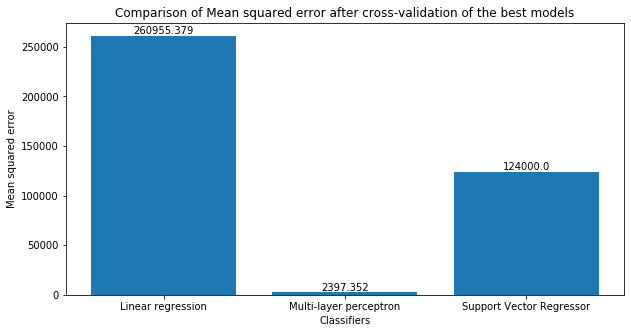

In [18]:
names = ['Linear regression','Multi-layer perceptron','Support Vector Regressor']
values = [cv_mse_lr, cv_mse_mlp ,cv_mse_svr]

#creating the bar plot 
fig = plt.figure(figsize = (10, 5))

plt.bar(names, values) 
for i in range(len(values)):
    plt.annotate(str(values[i]), xy=(names[i],values[i]), ha='center', va='bottom')  
plt.xlabel("Classifiers") 
plt.ylabel("Mean squared error") 
plt.title("Comparison of Mean squared error after cross-validation of the best models") 
plt.show() 

<span style='font-family:"Times New Roman"'><font size="4">__Testing the best predictive models on the validation data__
<hr>

In [19]:
y_predict_lr = lr.predict(X_valid)
y_predict_mlp = mlp.predict(X_valid_scaled)
y_predict_svr = svr.predict(X_valid_scaled)

In [20]:
lr_mse=round(mean_squared_error(y_predict_lr, y_valid),3)
mlp_mse=round(mean_squared_error(y_predict_mlp, y_valid ),3)
svr_mse=round(-compute_unscaled_neg_mean_squared_error(y_valid_scaled,y_predict_svr),3)

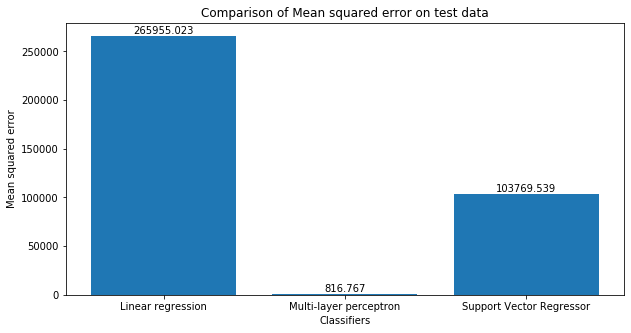

In [21]:
values = [lr_mse, mlp_mse ,svr_mse]

# creating the bar plot 
fig = plt.figure(figsize = (10, 5))
plt.bar(names, values) 
for i in range(len(values)):
    plt.annotate(str(values[i]), xy=(names[i],values[i]), ha='center', va='bottom')  
plt.xlabel("Classifiers") 
plt.ylabel("Mean squared error") 
plt.title("Comparison of Mean squared error on test data") 
plt.show() 

In [22]:
r2_lr=round(r2_score(y_valid,y_predict_lr),3)
r2_mlp=round(r2_score(y_valid,y_predict_mlp),3)
r2_svr=round(r2_score(y_valid_scaled,y_predict_svr),3)

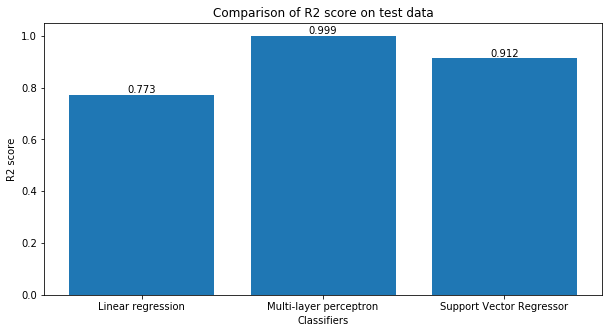

In [23]:
values = [r2_lr, r2_mlp ,r2_svr]

# creating the bar plot 
fig = plt.figure(figsize = (10, 5))
plt.bar(names, values) 
for i in range(len(values)):
    plt.annotate(str(values[i]), xy=(names[i],values[i]), ha='center', va='bottom')  
plt.xlabel("Classifiers") 
plt.ylabel("R2 score") 
plt.title("Comparison of R2 score on test data") 
plt.show() 

In [24]:
df = pd.DataFrame({'Record':range(0,len(y_valid)),'Actual': y_valid, 'Predicted(Multi-layer perceptron)':y_predict_mlp,'Predicted(Support Vector Regressor)':y_scaler.inverse_transform(y_predict_svr), 'Predicted(Linear regression)':y_predict_lr})
df1 = df.head(50)
 
df1.set_index('Record',inplace=True)
df1

,Actual,Predicted(Multi-layer perceptron),Predicted(Support Vector Regressor),Predicted(Linear regression)
Record,,,,
0,475.90,508.539091,588.486319,726.400002
1,171.50,158.726110,183.146305,385.820427
2,728.66,784.578626,913.438289,956.316462
3,0.00,1.177026,-43.762342,-344.788691
4,580.16,589.585834,776.467087,906.901620
5,0.00,-2.733381,253.393827,516.467786
6,0.00,-1.826787,-33.665007,-425.026423
7,2031.42,1960.445351,1764.234917,1761.464708
8,0.00,-18.061600,-107.127773,-162.947552


<span style='font-family:"Times New Roman"'><font size="4">__Demonstration of squared errors of predictors for each record__
<hr>

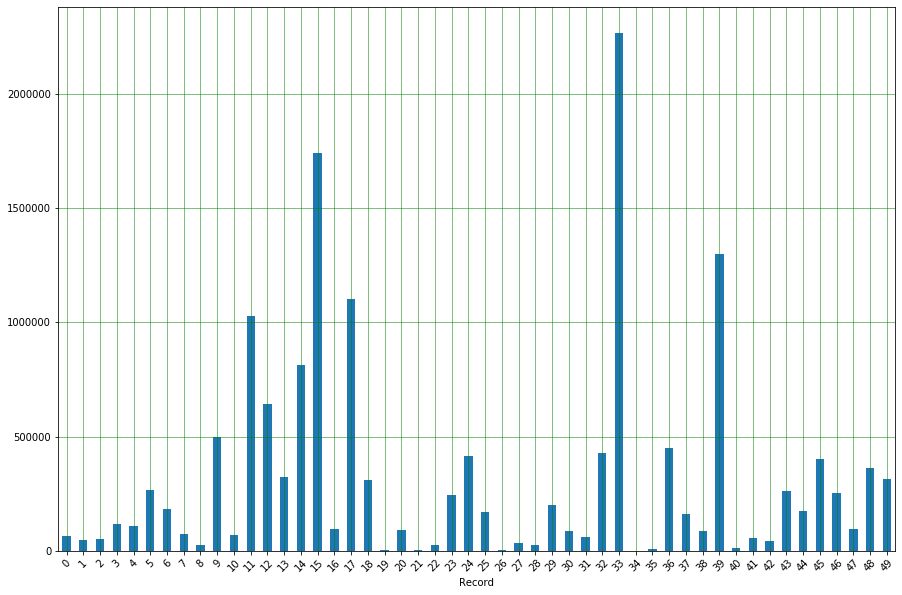

In [25]:
#Linear regression's squared errors
error = (df1['Actual'] - df1['Predicted(Linear regression)'])**2


error.plot(kind='bar',figsize=(15,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.xticks(rotation=45)
plt.show()

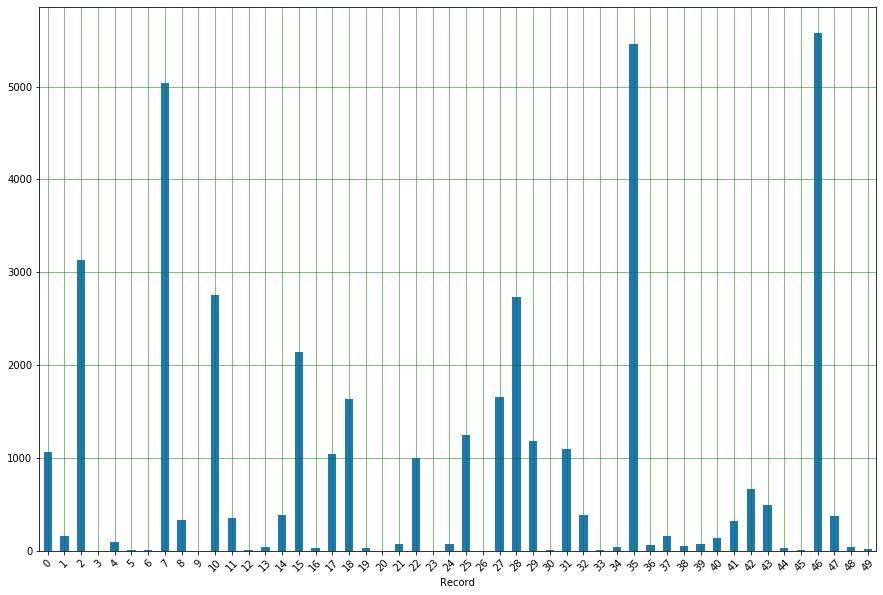

In [26]:
#Multi-layer perceptron's squared errors
error = (df1['Actual'] - df1['Predicted(Multi-layer perceptron)'])**2

error.plot(kind='bar',figsize=(15,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.xticks(rotation=45)
plt.show()

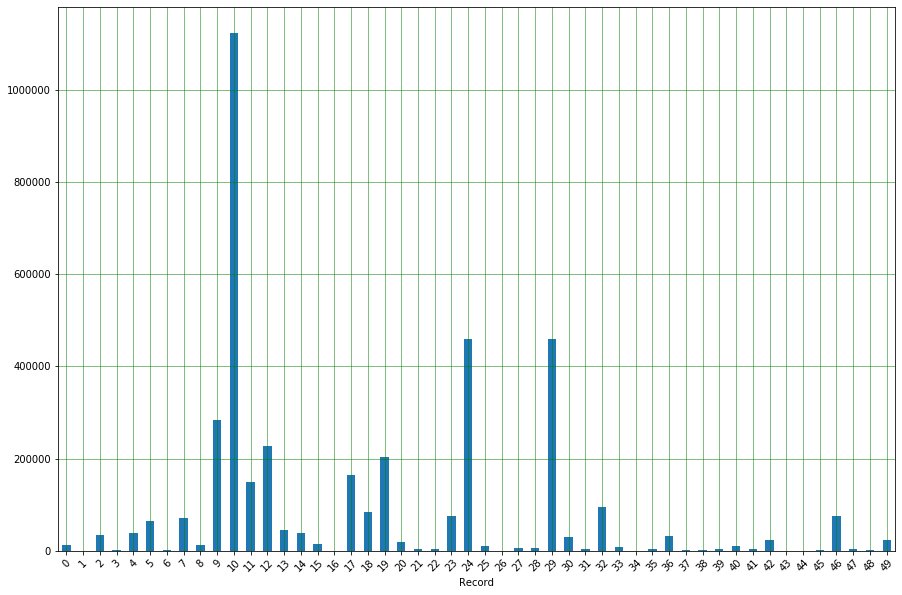

In [27]:
#Support vector machine's squared errors
error = (df1['Actual'] - df1['Predicted(Support Vector Regressor)'])**2

error.plot(kind='bar',figsize=(15,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.xticks(rotation=45)
plt.show()

<span style='font-family:"Times New Roman"'><font size="4">__Demonstration of predictors' accuracies on each record__
<hr>

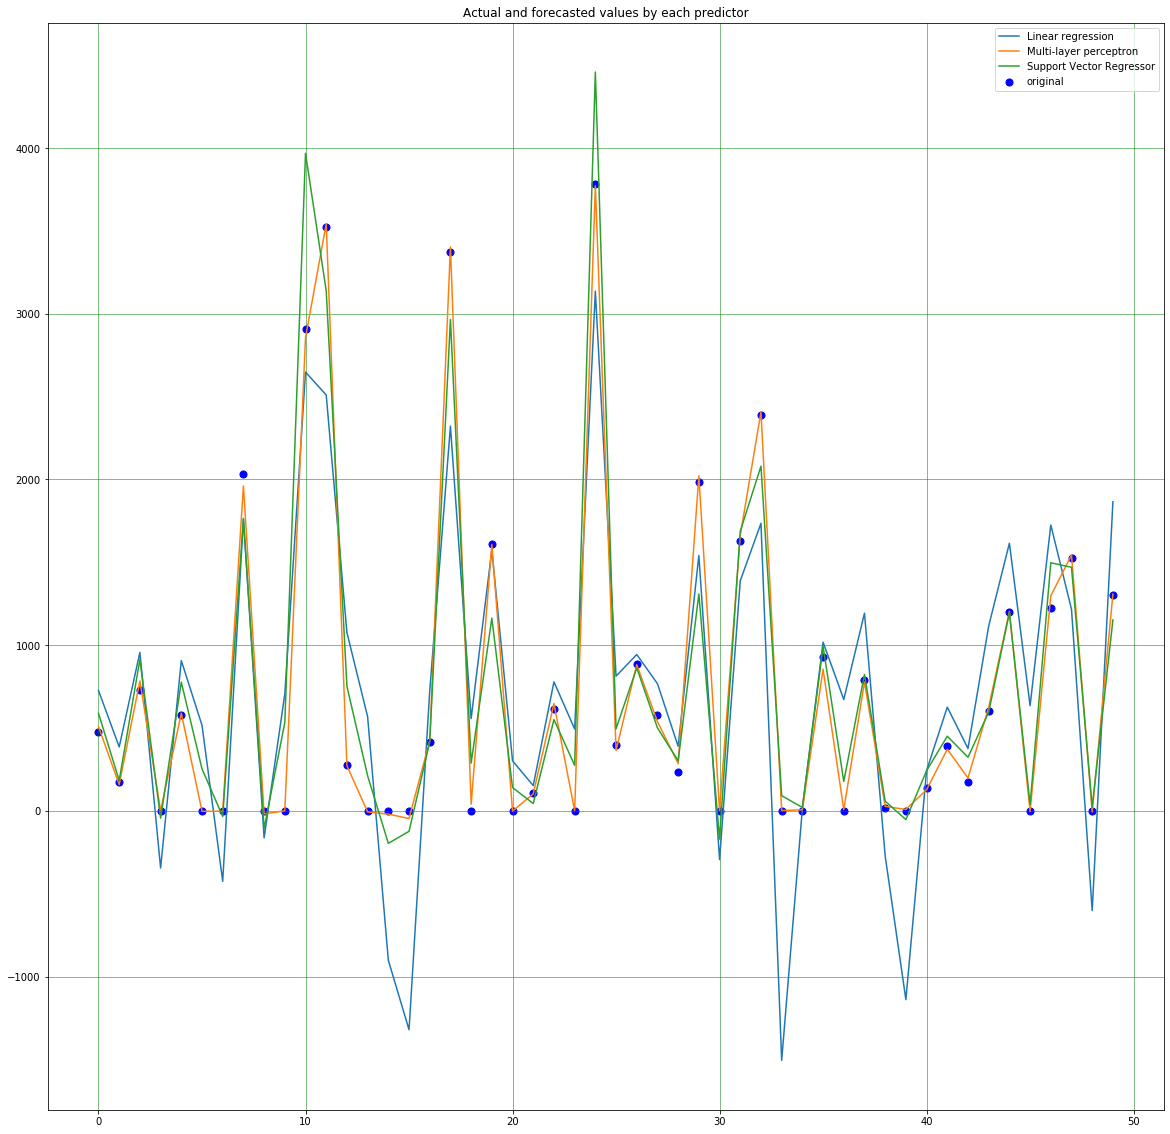

In [28]:
x_ax = range(len(df1['Actual']))
plt.figure(figsize=(20, 20))
plt.scatter(x_ax, df1['Actual'],  s=50, color="blue", label="original")
plt.plot(x_ax, df1['Predicted(Linear regression)'], label="Linear regression")
plt.plot(x_ax, df1['Predicted(Multi-layer perceptron)'], label="Multi-layer perceptron")
plt.plot(x_ax, df1['Predicted(Support Vector Regressor)'], label="Support Vector Regressor")
plt.title("Actual and forecasted values by each predictor")
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.legend()
plt.show()

<span style='font-family:"Times New Roman"'><font size="4">__b) Prediction on a hold-out test set.__</font></span><br>
<span style='font-family:"Times New Roman"'><font size="4"> An additional dataset, __CE802_P3_Test.csv__, is provided
inside the __CE802_P3_Data.zip__ archive. Target values are withheld for this test set (i.e. the “Value”
column is empty). In this second task you are required to produce predictions of the records in
the test set using one approach of your choice among those tested in task “a” (for example the one
achieving the best performance). These data must not be used other than to test the algorithm
trained on the training data.
As part of your submission you should submit a new version of the file __CE802_P3_Test.csv__ in
CSV format with the missing “Value” column replaced with the output predictions obtained using
the approach chosen. This second task will be marked based on the mean squared error on the test
set.</font></span><br><br>
<span style='font-family:"Times New Roman"'><font size="4">__Prediction of target values from the test dataset__
<hr>

In [29]:
y_pred_lr = lr.predict(X_test)
y_pred_mlp= mlp.predict(X_test_scaled)
#unscaling scaled results
y_pred_svr = y_scaler.inverse_transform(svr.predict(X_test_scaled).reshape(-1,1)).ravel()  

df = pd.DataFrame({'Predicted #':range(0,len(X_test)),'Multi-layer perceptron':y_pred_mlp,'Support Vector Regressor':y_pred_svr, 'Linear regression':y_pred_lr})
df.set_index('Predicted #',inplace=True)

In [30]:
df.head(50)

,Multi-layer perceptron,Support Vector Regressor,Linear regression
Predicted #,,,
0,502.829691,537.405356,739.920670
1,-4.395854,-99.969252,275.760310
2,3698.208751,3248.694602,2653.437827
3,2470.120800,2138.339931,1765.704389
4,2.854894,-569.030387,151.045057
5,2088.009765,2252.262093,2100.274914
6,226.007456,669.279691,744.634067
7,513.348399,906.738057,842.083932
8,-1.597038,-186.832498,-107.316205


In [31]:
for i in range(0,len(y_pred_lr)):
    test_data.loc[i,'Target']=y_pred_mlp[i]

In [32]:
test_data.head(50)

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,Target
0,28.70,0.82,-115.06,USA,-280.95,581.10,0.06,214.35,2,2,-0.88,Low,-14794.01,-15.09,-35.61,1578.68,502.829691
1,5.40,6.90,-170.24,Rest,-228.00,330.54,0.31,-164.98,1,9,0.28,Medium,-11632.88,0.72,-29.73,1647.02,-4.395854
2,21.96,4.40,-219.12,Rest,-59.67,662.28,4.98,281.54,6,5,5.82,Low,-12631.29,-23.61,-32.73,1449.14,3698.208751
3,10.52,1.02,-184.14,UK,-211.23,506.55,0.57,-311.96,7,5,1.92,High,-26664.88,1.80,-22.92,911.98,2470.120800
4,2.00,0.58,-190.56,Rest,-284.82,649.41,0.05,291.47,8,3,-0.02,Low,-9901.41,-13.47,-48.81,2251.04,2.854894
5,6.88,10.08,-152.68,Europe,-25.44,552.48,0.04,-45.70,2,3,13.46,Very high,-13981.56,-16.23,-43.65,1794.62,2088.009765
6,6.90,8.64,-137.02,UK,-196.29,484.35,0.17,295.68,4,5,10.18,High,-16991.80,-0.60,-37.53,1883.68,226.007456
7,4.94,6.58,-174.58,UK,-46.59,521.73,0.00,163.00,2,7,3.80,High,-20337.81,-1.38,-37.11,1809.20,513.348399
8,4.32,9.62,-218.96,UK,-272.67,636.09,2.32,464.36,3,5,7.72,Medium,-15804.53,-8.16,-31.62,1612.52,-1.597038
9,10.74,11.60,-113.76,UK,-218.49,446.67,3.89,-241.92,5,3,11.26,Low,-15325.52,-9.42,-29.82,2081.48,2218.319345


In [33]:
#Saving the table
import pathlib
pathlib.Path('Results').mkdir(parents=True, exist_ok=True) 
test_data.to_csv(result_file, sep=',', index=False)

<span style='font-family:"Times New Roman"'><font size="4">__Building a correlation matrix using retrieved results__
<hr>

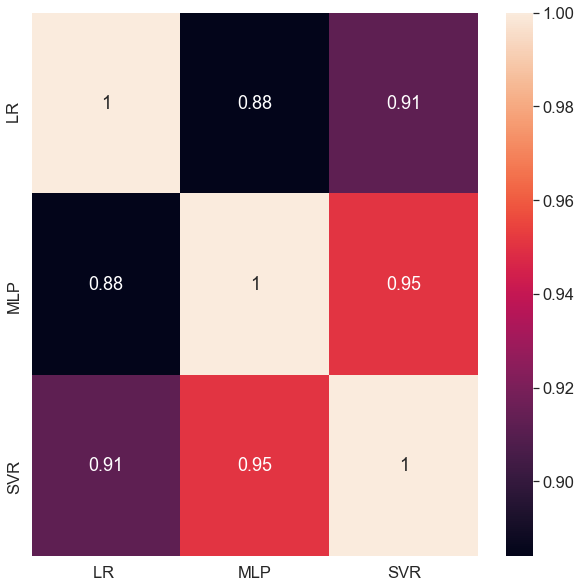

In [34]:
results={"LR ":y_pred_lr,"MLP":y_pred_mlp, "SVR":y_pred_svr}
df = pd.DataFrame(results,columns=results.keys())
corrMatrix = df.corr()
plt.figure(figsize=(10,10))
sn.set(font_scale=1.5)
sn.heatmap(corrMatrix, annot=True)
plt.show()

<span style='font-family:"Times New Roman"'><font size="4">__Explanation of the built correlation matrix__</font></span><br>
><span style='font-family:"Times New Roman"'><font size="4">As it can be seen from the correlation matrix above, outcomes from the Support vector machines' regression model and with the Multi-layer perceptron's one have the biggest similiarity.</font></span>


In [35]:
corrMatrix

,LR,MLP,SVR
LR,1.000000,0.883992,0.912172
MLP,0.883992,1.000000,0.950937
SVR,0.912172,0.950937,1.000000
